<a href="https://colab.research.google.com/github/shahnawazsyed/MAT422/blob/main/k_means%2BSVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **3.5 K-means & 3.6 Support Vector Machine**

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# **3.5 K-means**

K-means clustering is the process of partitioning *n* observations into *k* clusters in which each observation belongs to the cluster with the nearest mean (cluster center/certeroid).

Given a $(x_1, x_2,..x_n)$ where each observation is a real vector, we wish to minimize the squared distance of each vector from its centeroid summed over all vector. This distance is called the within-cluster sum of squares (WCSS) and is analagous to variance.

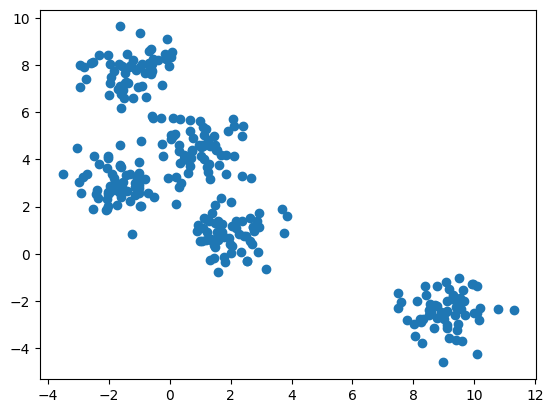

In [34]:
#generating sample data
X, y = make_blobs(n_samples=300, centers=5, cluster_std=0.75, random_state=0)
plt.scatter(X[:, 0], X[:, 1])
plt.show()
k = 5

The general *k*-means clustering algorithm is as follows:

1. Randomly assign a centeroid to each of the *k* clusters

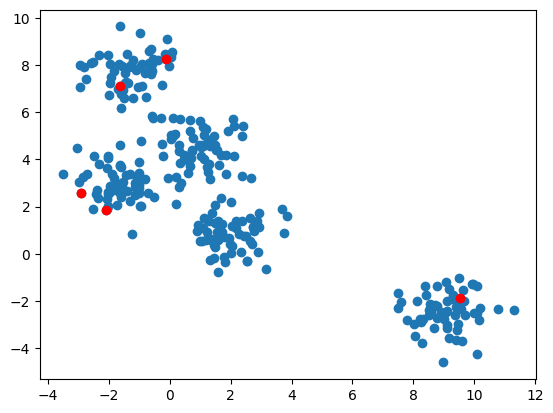

In [20]:
centroids = X[np.random.choice(X.shape[0], k, replace=False)]
plt.scatter(X[:, 0], X[:, 1])
plt.scatter(centroids[:, 0], centroids[:, 1], c='r')
plt.show()

2. Using the Euclidean distance function, assign objects to their closest cluster center

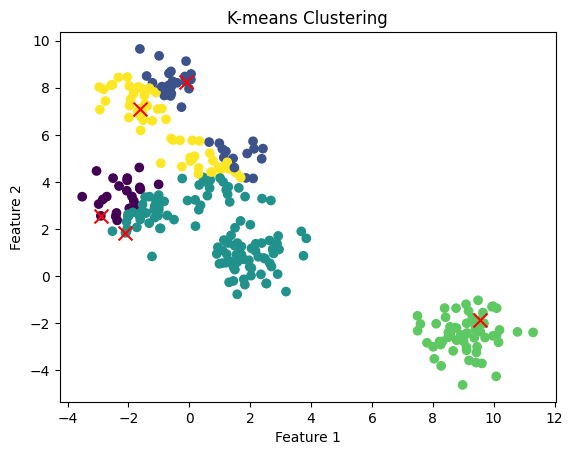

In [21]:
def euclidean_dist(x1, x2):
    return np.sqrt(np.sum((x1 - x2)**2))

clusters = []
for i in range(X.shape[0]):
    distances = []
    for j in range(k):
        distances.append(euclidean_dist(X[i], centroids[j]))
    cluster = np.argmin(distances)
    clusters.append(cluster)

plt.scatter(X[:, 0], X[:, 1], c=clusters)
plt.scatter(centroids[:, 0], centroids[:, 1], c='r', marker='x', s=100)  # Plot centroids
plt.title('K-means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

3. Calculate the centroid (mean) of all objects in each cluster

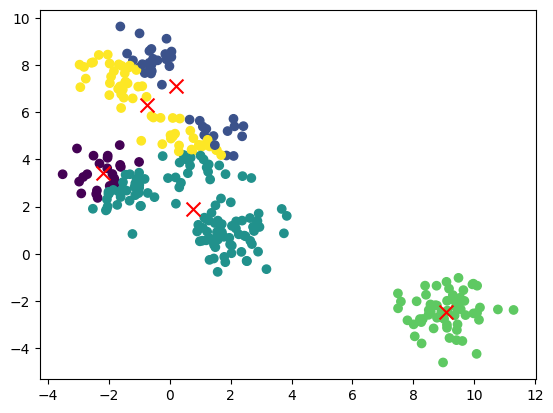

In [22]:
for cluster in clusters:
    centroids[cluster] = np.mean(X[np.array(clusters) == cluster], axis=0)

plt.scatter(X[:, 0], X[:, 1], c=clusters)
plt.scatter(centroids[:, 0], centroids[:, 1], c='r', marker='x', s=100)
plt.show()

We will repeat these steps until the same ponts are assigned to each other in consecutive rounds.

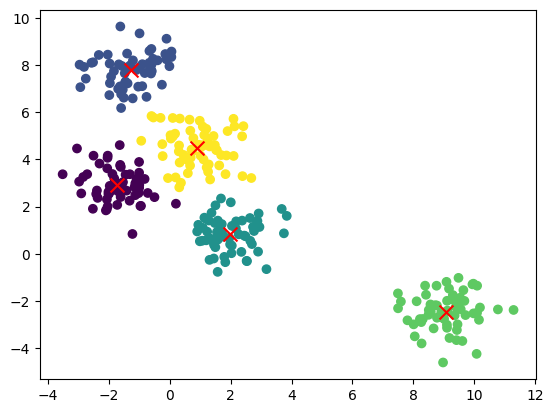

In [23]:
for i in range(10): #max iterations: 10
    prev_clusters = clusters.copy()
    for i in range(X.shape[0]):
        distances = []
        for j in range(k):
            distances.append(euclidean_dist(X[i], centroids[j]))
        cluster = np.argmin(distances)
        clusters[i] = cluster
    for cluster in clusters:
        centroids[cluster] = np.mean(X[np.array(clusters) == cluster], axis=0)
    if np.array_equal(prev_clusters, clusters):
        break

plt.scatter(X[:, 0], X[:, 1], c=clusters)
plt.scatter(centroids[:, 0], centroids[:, 1], c='r', marker='x', s=100)
plt.show()

# **3.6 Support Vector Machine (SVM)**

SVMs are supervised learning models that analyze data for classification and regression analysis. Given a set of training examples, where each is classified in one of two categories, a SVM algorithm trains a model that assigns new examples to one of the categories.

An SVM maps training data to points in space such that the width of the gap between the two categories is maximized. Predictions on new data is determined according to which side of the gap they fall.

Suppose we are given a training dataset of *n* points:

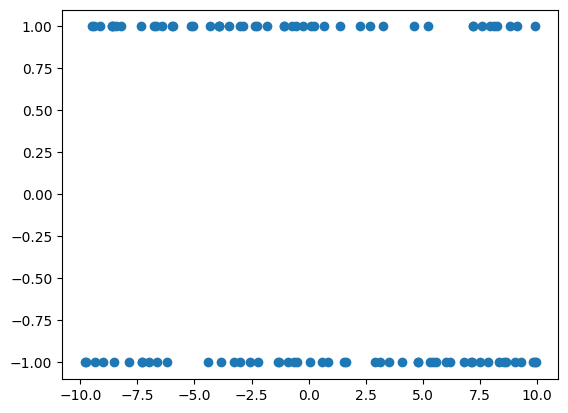

In [29]:
x_train = np.random.uniform(-10, 10, 100)
y_train = np.random.choice([-1, 1], 100) #y is either -1 or 1 as we are classifying the binary case that x belongs to
plt.scatter(x_train, y_train)
plt.show()

To maximize the distance between the two categories, we can use scikit-learn's SVC class for classification:

Accuracy: 60.00%


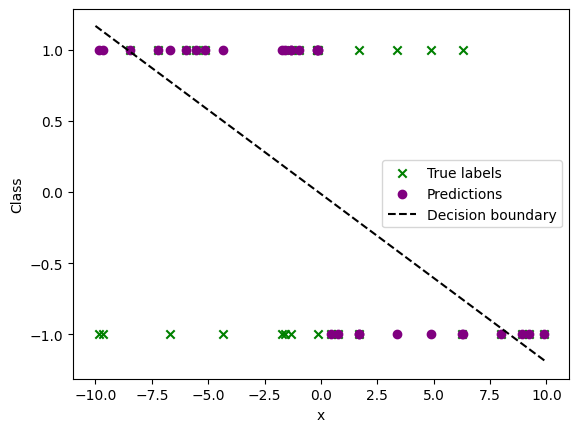

In [32]:
X_train = x_train.reshape(-1, 1)
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)

#test data
x_test = np.random.uniform(-10, 10, 30)
y_test = np.random.choice([-1, 1], 30)
X_test = x_test.reshape(-1, 1)

#predict based on test data
y_pred = svm.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

plt.scatter(x_test, y_test, c='green', marker='x', label='True labels')
plt.scatter(x_test, y_pred, c='purple', marker='o', facecolors='none', label='Predictions')
xmin, xmax = -10, 10
xx = np.linspace(xmin, xmax, 100).reshape(-1, 1)
decision_boundary = svm.decision_function(xx) #decision boundary
plt.plot(xx, decision_boundary, color='black', linestyle='--', label='Decision boundary')

plt.xlabel('x')
plt.ylabel('Class')
plt.legend()
plt.show()


The decision boundary divides classes on one side as 1 and the other as -1.